### Importing neccessary libraries i.e pandas, numpy and matploblib

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
filepath = '/content/gdrive/My Drive/Colab_Data/'
filename = 'noshowappointments.csv'

In [9]:
df = pd.read_csv(filepath + filename)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [0]:
df.drop(['PatientId','AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [14]:
df.columns, df.shape

(Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
        'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
        'No-show'],
       dtype='object'), (110527, 11))

In [0]:
df.columns =[col.lower() for col in df.columns]
df.rename(columns = {'no-show':'noshow'}, inplace=True)

In [0]:
#df['scheduledday'].to_datetime()
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [29]:
print([df[col].isnull().any() for col in df.columns])

[False, False, False, False, False, False, False, False, False, False, False]


In [0]:
noshow = df.noshow == 'No'
show = df.noshow == 'Yes'

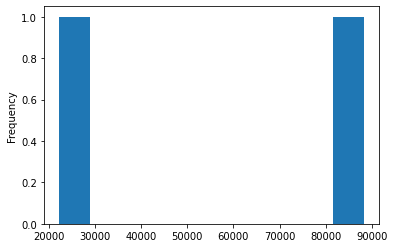

In [50]:
df.groupby('noshow')['gender'].count().plot(kind = 'hist')